

<h1><center><font size="6"> Kaggle: Brain Tumor Classification (MRI)
Treatment</font></center></h1>

<h3><center><font size="4"> https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri </font></center></h2>



# Problem Statement:
A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients.

The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors, their properties, a lot of abnormalities in the sizes and location of the brain tumor(s).

A professional Neurosurgeon is required for MRI analysis. In developing countries, the lack of skillful doctors and lack of knowledge about tumors makes it really challenging and time-consuming to generate reports from MRI. Automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Therefore, proposing a system performing detection and classification by using Deep Learning Algorithms using Convolution Neural Network (CNN), Artificial Neural Network (ANN), and Transfer Learning (TL) would be helpful to doctors all around the world.

# Objective:
- Provide an automated tool to detect and classify brain tumors.

- Design a highly accurte Deep Learning (DL) pipeline since this is a medical related problem and error can be really costly. 

# Dataset:

- This Kaggle project has one training folder and one testing folder, which contain MRI data. 

- Each folder has four subfolders that contain MRIs of respective tumor classes.


# <a id='1'>1. Initialization</a>  


In [ ]:
import os
import cv2
import PIL 
import shutil
import zipfile 
import math
import numpy as np 
import pandas as pd 
from glob import glob
from PIL import Image 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#-------------------------------------------------------------------------------
# TF & Keras
import keras
import tensorflow as tf
from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [ ]:
zip_file_path = '/content/drive/MyDrive/DatasetBrain.zip'
data_path = '/content/drive/MyDrive/RGBimages' 
Training_path = '/content/drive/MyDrive/RGBimages/Training'
Testing_path = '/content/drive/MyDrive/RGBimages/Testing'

# The training folder is devided into Train and Val datsets
Training_temp_path = '/content/drive/MyDrive/RGBimages/Training_temp'
Validation_temp_path = '/content/drive/MyDrive/RGBimages/Validation_temp'

# Each folder has MRIs of four tumor classes.
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

nb_classes = 4
Random_State = 42
epochs = 50



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <a id='2'>2. Data Insights</a>  


## <a id='21'>2.1 Loading Data</a>  


In [ ]:
# Unzip the dataset file and save it in a defined path and folder 
# with zipfile.ZipFile(zip_file_path,"r") as file:
#   file.extractall(data_path)

In [ ]:
# path_tmp = '/content/drive/MyDrive/RGBimages/Training/glioma_tumor'

## Read the full directory
# glob(path_tmp + "/*")
# glob(os.path.join(path_tmp, "*"))

## Read only names in the folder
# os.listdir(path_tmp)

## <a id='22'>2.2 Data Visualization and Insights</a>  


Check number of images on Train and Test sets for each class.

In [ ]:
# Here, a dictionery is defind. 
# The dictionary keys are our four classes.
# Each row contains an image directory.
dataset_tr = {'glioma_tumor':[],'no_tumor':[],'meningioma_tumor':[],'pituitary_tumor':[]}
dataset_te = {'glioma_tumor':[],'no_tumor':[],'meningioma_tumor':[],'pituitary_tumor':[]}
## OR
# dataset = { i : [] for i in labels }

# ------------------------------------------------------------------------------
# Initialize a list to count number of images in each class in training and tesing sets.
class_dist_tr = []
class_dist_te = []

# for train set
for cls in dataset_tr.keys():
  for img_path_tr in os.listdir(os.path.join(Training_path,cls)):
    dataset_tr[cls].append(os.path.join(Training_path,cls,img_path_tr))
  class_dist_tr.append(len(dataset_tr[cls]))   
# for test set
  for img_path_te in os.listdir(os.path.join(Testing_path,cls)):
    dataset_te[cls].append(os.path.join(Testing_path,cls,img_path_te))
  class_dist_te.append(len(dataset_te[cls]))  

# For train and test set, print number of images in each class.
  print(cls,":")
  print("Number of images in Training set = {}".format(len(dataset_tr[cls]))) 
  print("Number of images in Testing set = {}".format(len(dataset_te[cls]))) 
  print('\n')

glioma_tumor :
Number of images in Training set = 826
Number of images in Testing set = 100


no_tumor :
Number of images in Training set = 395
Number of images in Testing set = 105


meningioma_tumor :
Number of images in Training set = 822
Number of images in Testing set = 115


pituitary_tumor :
Number of images in Training set = 827
Number of images in Testing set = 74




Visualize portion of each class in Train and Test sets.

Text(0.5, 1.0, 'Proportion of each Class in Testing set')

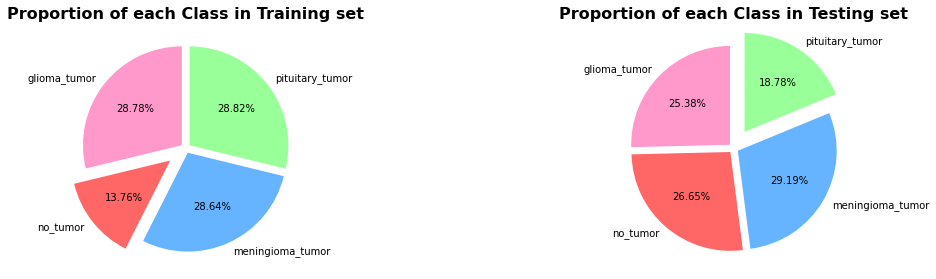

In [ ]:
colors = ['#ff99cc', '#ff6666','#66b3ff','#99ff99']

fig = plt.figure(figsize=(18,10))

#first row, first column
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(class_dist_tr, startangle=90, explode=[0.05,0.2,0.05,0.05], autopct='%0.2f%%', labels=labels, colors = colors)
plt.title('Proportion of each Class in Training set', fontweight='bold', fontsize=16)

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(class_dist_te, startangle=90, explode=[0.05,0.05,0.05,0.2], autopct='%0.2f%%', labels=labels, colors = colors)
plt.title('Proportion of each Class in Testing set', fontweight='bold', fontsize=16)

In [ ]:
# Visualize all images from each class
# for cls in labels:
#   for IMG_dir in dataset[cls]:
#     img = cv2.imread(IMG_dir, cv2.IMREAD_GRAYSCALE)
#     plt.imshow(img,cmap = 'gray')
#     plt.show()
#     print("\n","Image Class: {}".format(cls),"\n",
#           "Image Shape: {}".format(img.shape),"\n",
#           "Image Maximum RGB Value: {}".format(img.max()),"\n",
#           "Image Minimum RGB Value: {}".format(img.min()),"\n",         
#           "Image Data Type: {}".format(img.dtype),"\n",
#           "Image Type: {}".format(type(img))
#           )
   

For Train set, isualize one image from each class and save the image info in a defined dataframe.

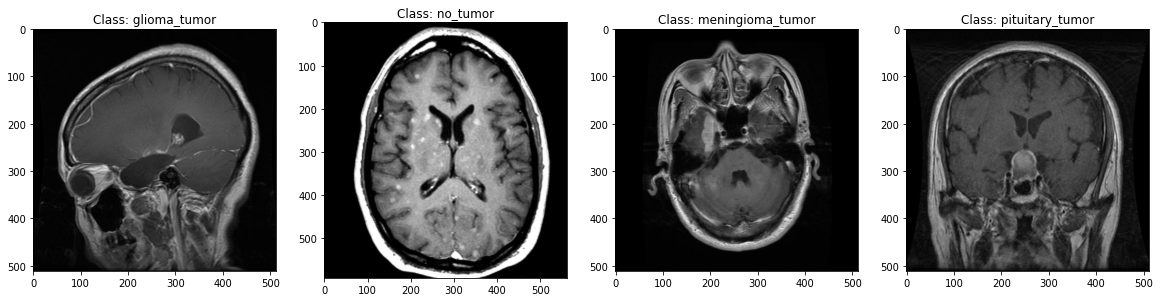

In [ ]:
# initialize a dataframe
Image_info_tr = pd.DataFrame(columns = ['Image Shape', 'Max RGB Val.', 'Min RGB Val.', 'Data Type', 'Image Type'], index = [labels])

count = 0
f, ax = plt.subplots(1, len(labels),figsize = (20,20))
# loop through all classes
for cls in labels:
  # only one image from the selected class
  for IMG_dir in dataset_tr[cls][3:4]:
    img = cv2.imread(IMG_dir, cv2.IMREAD_GRAYSCALE)
    ax[count].imshow(img,cmap = 'gray')
    ax[count].set_title("Class: " + cls)
    Image_info_tr.iloc[count] = np.array((img.shape,img.max(),img.min(),img.dtype,type(img)), dtype="object")
    count += 1
    img.size

In [ ]:
Image_info_tr

,Image Shape,Max RGB Val.,Min RGB Val.,Data Type,Image Type
glioma_tumor,"(512, 512)",253,0,uint8,<class 'numpy.ndarray'>
no_tumor,"(592, 562)",255,0,uint8,<class 'numpy.ndarray'>
meningioma_tumor,"(512, 512)",255,0,uint8,<class 'numpy.ndarray'>
pituitary_tumor,"(512, 512)",255,0,uint8,<class 'numpy.ndarray'>


For Test set, isualize one image from each class and save the image info in a defined dataframe.

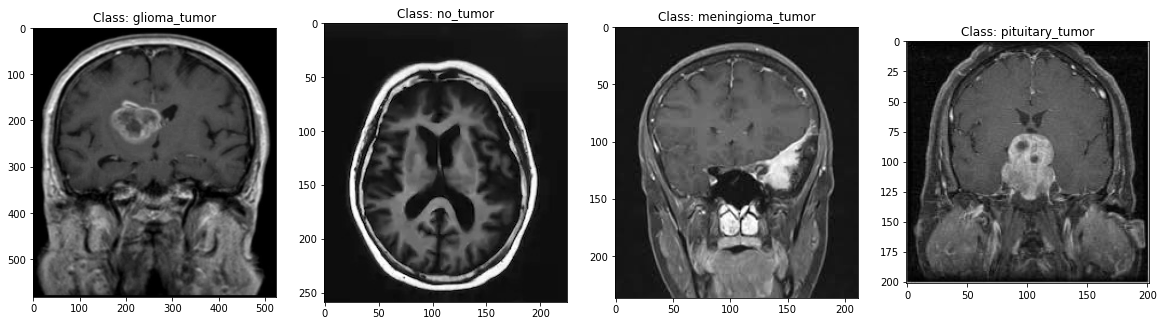

In [ ]:
# initialize a dataframe
Image_info_te = pd.DataFrame(columns = ['Image Shape', 'Max RGB Val.', 'Min RGB Val.', 'Data Type', 'Image Type'], index = [labels])

count = 0
f, ax = plt.subplots(1, len(labels),figsize = (20,20))
# loop through all classes
for cls in labels:
  # only one image from the selected class
  for IMG_dir in dataset_te[cls][3:4]:
    img = cv2.imread(IMG_dir, cv2.IMREAD_GRAYSCALE)
    ax[count].imshow(img,cmap = 'gray')
    ax[count].set_title("Class: " + cls)
    Image_info_te.iloc[count] = np.array((img.shape,img.max(),img.min(),img.dtype,type(img)), dtype="object")
    count += 1
    img.size

In [ ]:
Image_info_te

,Image Shape,Max RGB Val.,Min RGB Val.,Data Type,Image Type
glioma_tumor,"(581, 524)",255,0,uint8,<class 'numpy.ndarray'>
no_tumor,"(259, 225)",255,0,uint8,<class 'numpy.ndarray'>
meningioma_tumor,"(237, 212)",255,2,uint8,<class 'numpy.ndarray'>
pituitary_tumor,"(202, 202)",255,0,uint8,<class 'numpy.ndarray'>


## <a id='23'>2.3 Train/Validation Split</a>  


In [ ]:
# The Kaggle dataset has two train and test folder. Here, I split the train set into train and validation sets.

'''
# Create a folder for training:
# Directory
directory = "Training_temp"
# Parent Directory path
parent_dir = "/content/drive/MyDrive/RGBimages"
# Path
path = os.path.join(parent_dir, directory)
os.mkdir(path)

# Creat a folder for testing:
# Directory
directory = "Testing_temp"
# Parent Directory path
parent_dir = "/content/drive/MyDrive/RGBimages"
# Path
path = os.path.join(parent_dir, directory)
os.mkdir(path)

# Split data into train and valididation set
# X_train = []
# y_train = []
# X_val = []
# y_val = []
for index,cls in enumerate(dataset_tr.keys()):
  X_train_temp, X_val_temp, y_train_temp, y_val_temp = train_test_split(dataset_tr[cls],
                                                                          [index] * len(dataset_tr[cls]),
                                                                          test_size=0.1, 
                                                                          random_state=Random_State)
  
  # # We do not need the folowing lines since we eill be using ImageDataGenerator.
  # X_train += X_train_temp
  # y_train += [index] * len(dataset_tr[cls])
  # X_val += X_val_temp
  # y_val += [index] * len(dataset_tr[cls])

  # For training, creat a sub_folder for each class:
  path = os.path.join("/content/drive/MyDrive/RGBimages/Training_temp", cls)
  os.mkdir(path)
  # Save images in sub_folder
  for row in range(len(X_train_temp)):
    shutil.copy( X_train_temp[row], path+'/'+os.path.split(X_train_temp[row])[1])

  # For testing, creat a sub_folder for each class:
  path = os.path.join("/content/drive/MyDrive/RGBimages/Validation_temp", cls)
  os.mkdir(path)
  for row in range(len(X_val_temp)):
    shutil.copy( X_val_temp[row], path+'/'+os.path.split(X_val_temp[row])[1])


    # # creating a image object (main image) 
    # im_val = Image.open(X_val_temp[row])      
    # # save a image using extension
    # im_val = im_val.save('/content/drive/MyDrive/RGBimages/Validation_temp/'+cls+'/'+os.path.split(X_val_temp[row])[1] )
    
 '''   

'\n# Create a folder for training:\n# Directory\ndirectory = "Training_temp"\n# Parent Directory path\nparent_dir = "/content/drive/MyDrive/RGBimages"\n# Path\npath = os.path.join(parent_dir, directory)\nos.mkdir(path)\n\n# Creat a folder for testing:\n# Directory\ndirectory = "Testing_temp"\n# Parent Directory path\nparent_dir = "/content/drive/MyDrive/RGBimages"\n# Path\npath = os.path.join(parent_dir, directory)\nos.mkdir(path)\n\n# Split data into train and valididation set\n# X_train = []\n# y_train = []\n# X_val = []\n# y_val = []\nfor index,cls in enumerate(dataset_tr.keys()):\n  X_train_temp, X_val_temp, y_train_temp, y_val_temp = train_test_split(dataset_tr[cls],\n                                                                          [index] * len(dataset_tr[cls]),\n                                                                          test_size=0.1, \n                                                                          random_state=Random_State)\n  \n  # # We do no

# <a id='3'>3. Building Model</a>  



## <a id='3'>3.1 Simple Model (Model1)</a>  

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
    # The First Convolution   
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(224, 224,1)),   
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(nb_classes, activation='softmax')                      
    ])
  model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])
  return model


In [ ]:
# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

### <a id='311'>3.1.1 Data Preprocessing for Model1</a> 

Let's set up data generators to

- Read pictures in our source folders
- Convert pictures to float32 tensors
- Feed pictures (with their labels) to our network.

We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 150x150 and their labels (categorical).

** Note**

- Data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network (It is uncommon to feed raw pixels into a convnet). In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range. In Keras, this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter.

-  This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.

In [ ]:
# rescale all images by 1./255
train_gen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(
    Training_temp_path,
    target_size=(224, 224),
    color_mode="grayscale",
    batch_size=32,
    classes=None,
    class_mode="categorical",
    shuffle=True)

validation_generator = val_datagen.flow_from_directory(
        Validation_temp_path,
        target_size=(224, 224),
        color_mode="grayscale",
        batch_size=32,
        classes=None,
        class_mode="categorical",
        shuffle=True)

print('\n')
print('batch size is {}'. format(train_generator.batch_size))
print('For training set, image shape is {}'. format(train_generator.image_shape))
print('For testing set, image shape is {}'. format(validation_generator.image_shape))

Found 2581 images belonging to 4 classes.
Found 289 images belonging to 4 classes.


batch size is 32
For training set, image shape is (224, 224, 1)
For testing set, image shape is (224, 224, 1)


### <a id='312'>3.1.2 Model1 Training</a> 

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path  = "/content/drive/MyDrive/RGBimages/MODEL/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

#### uncomment the following lines to tarin and save the model

# Create a callback that saves the best model
callbacks = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor="val_accuracy",
    verbose=2,
    save_best_only=True,
    save_weights_only=True,
    mode="auto",
    save_freq="epoch",
    options=None,
)

# Create a new model instance
model = create_model()

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=epochs,
            verbose=2,
            callbacks = [callbacks])


Epoch 1/50
81/81 - 21s - loss: 1.1449 - accuracy: 0.5072 - val_loss: 0.9041 - val_accuracy: 0.6159

Epoch 00001: val_accuracy improved from -inf to 0.61592, saving model to /content/drive/MyDrive/RGBimages/MODEL/cp-0001.ckpt
Epoch 2/50
81/81 - 18s - loss: 0.7608 - accuracy: 0.6815 - val_loss: 0.8587 - val_accuracy: 0.6263

Epoch 00002: val_accuracy improved from 0.61592 to 0.62630, saving model to /content/drive/MyDrive/RGBimages/MODEL/cp-0002.ckpt
Epoch 3/50
81/81 - 18s - loss: 0.5862 - accuracy: 0.7602 - val_loss: 0.4802 - val_accuracy: 0.8201

Epoch 00003: val_accuracy improved from 0.62630 to 0.82007, saving model to /content/drive/MyDrive/RGBimages/MODEL/cp-0003.ckpt
Epoch 4/50
81/81 - 17s - loss: 0.4564 - accuracy: 0.8222 - val_loss: 0.4755 - val_accuracy: 0.8097

Epoch 00004: val_accuracy did not improve from 0.82007
Epoch 5/50
81/81 - 17s - loss: 0.3359 - accuracy: 0.8621 - val_loss: 0.3755 - val_accuracy: 0.8478

Epoch 00005: val_accuracy improved from 0.82007 to 0.84775, savi

Let's visualize the training/validation accuracy and loss as collected during training:

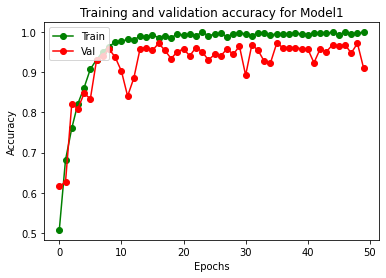

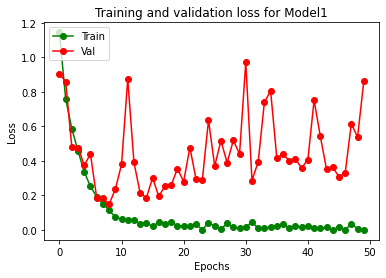

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc,'go-' )
plt.plot  ( epochs, val_acc,'ro-' )
plt.title ('Training and validation accuracy for Model1')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss,'go-' )
plt.plot  ( epochs, val_loss,'ro-' )
plt.title ('Training and validation loss for Model1')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")

In [ ]:
## Visualizing Intermediate Representations
# import random
# from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# glioma_tumor_path = "/content/drive/MyDrive/RGBimages/Training_temp/glioma_tumor"
# meningioma_tumor_path = "/content/drive/MyDrive/RGBimages/Training_temp/meningioma_tumor"
# no_tumor_path = "/content/drive/MyDrive/RGBimages/Training_temp/no_tumor"
# pituitary_tumor_path = "/content/drive/MyDrive/RGBimages/Training_temp/pituitary_tumor"


# # Let's define a new Model that will take an image as input, and will output
# # intermediate representations for all layers in the previous model after
# # the first.
# successive_outputs = [layer.output for layer in model.layers[1:]]

# #visualization_model = Model(img_input, successive_outputs)
# visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# glioma_tumor_img_files = [os.path.join(glioma_tumor_path,f) for f in os.listdir(glioma_tumor_path)]
# meningioma_tumor_img_files = [os.path.join(meningioma_tumor_path,f) for f in os.listdir(meningioma_tumor_path)]
# no_tumor_img_files = [os.path.join(no_tumor_path,f) for f in os.listdir(no_tumor_path)]
# pituitary_tumor_img_files = [os.path.join(pituitary_tumor_path,f) for f in os.listdir(pituitary_tumor_path)]

# img_path = random.choice(glioma_tumor_img_files + meningioma_tumor_img_files + no_tumor_img_files + pituitary_tumor_img_files)
# img = load_img(img_path, target_size=(150, 150), grayscale=True)  # this is a PIL image

# x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
# x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# # Rescale by 1/255
# x /= 255.0

# # Let's run our image through our network, thus obtaining all
# # intermediate representations for this image.
# successive_feature_maps = visualization_model.predict(x)

# # These are the names of the layers, so can have them as part of our plot
# layer_names = [layer.name for layer in model.layers]

# # -----------------------------------------------------------------------
# # Now let's display our representations
# # -----------------------------------------------------------------------
# for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
#   if len(feature_map.shape) == 4:
    
#     #-------------------------------------------
#     # Just do this for the conv / maxpool layers, not the fully-connected layers
#     #-------------------------------------------
#     n_features = feature_map.shape[-1]  # number of features in the feature map
#     size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
#     # We will tile our images in this matrix
#     display_grid = np.zeros((size, size * n_features))
    
#     #-------------------------------------------------
#     # Postprocess the feature to be visually palatable
#     #-------------------------------------------------
#     for i in range(n_features):
#       x  = feature_map[0, :, :, i]
#       x -= x.mean()
#       x /= x.std ()
#       x *=  64
#       x += 128
#       x  = np.clip(x, 0, 255).astype('uint8')
#       display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

#     #-----------------
#     # Display the grid
#     #-----------------

#     scale = 20. / n_features
#     plt.figure( figsize=(scale * n_features, scale) )
#     plt.title ( layer_name )
#     plt.grid  ( False )
#     plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

### <a id='312'>3.1.2 Model1 Evaluationg</a> 


In [ ]:
os.listdir(checkpoint_dir)

['cp-0000.ckpt.data-00000-of-00001',
 'cp-0000.ckpt.index',
 'checkpoint',
 'cp-0001.ckpt.data-00000-of-00001',
 'cp-0001.ckpt.index',
 'cp-0002.ckpt.data-00000-of-00001',
 'cp-0002.ckpt.index',
 'cp-0003.ckpt.data-00000-of-00001',
 'cp-0003.ckpt.index',
 'cp-0005.ckpt.data-00000-of-00001',
 'cp-0005.ckpt.index',
 'cp-0007.ckpt.data-00000-of-00001',
 'cp-0007.ckpt.index',
 'cp-0008.ckpt.data-00000-of-00001',
 'cp-0008.ckpt.index',
 'cp-0009.ckpt.data-00000-of-00001',
 'cp-0009.ckpt.index',
 'cp-0015.ckpt.data-00000-of-00001',
 'cp-0015.ckpt.index',
 'cp-0017.ckpt.data-00000-of-00001',
 'cp-0017.ckpt.index']

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)

# # Create a new model instance
model = create_model()

# Load the previously saved weights
model.load_weights(latest)


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    Testing_path,
    target_size=(224, 224),
    color_mode="grayscale",
    batch_size=32,
    classes=None,
    class_mode="categorical",
    shuffle=True)

# Re-evaluate the model
score = model.evaluate(test_generator)
# print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

Found 394 images belonging to 4 classes.
13/13 [==============================] - 3s 187ms/step - loss: 7.2995 - accuracy: 0.7259


To imptove the accuracy, we can consider Transfer Learning along image augmentation.

# <a id='4'>4. Transfer Learning</a>  


When training data is very small, and there is only some common features
that can be extracted, even if we do some tricks like image augmentation. To address this problem, we can use Transfer Learning.

In Transfer Learning, 
- we take an existing model that is trained on far more data, and use the features that the model learned.

- we can lock first layers and train end layers on our data (In fact, we just retain layers that we want to specialize for the dataset and problem at hand.)


Let's take a well-trained state of the art model, which is called Inception. 

## <a id='41'>4.1 InceptionV3</a>  

Inception has been pre-trained on a dataset from ImageNet, which has 1.4 million images in a 1000 different classes. The Inception Architecture is designed for 150 by 150 images.

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-09-07 21:57:36--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.202.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  54.3MB/s    in 1.5s    

2021-09-07 21:57:38 (54.3 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



### <a id='411'>4.1.1 Define InceptionV3 Network</a>  

In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(
                                input_shape=(150, 150,3),
                                include_top=False, 
                                weights=None)

# local_weights_file
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final relu layer for classification
x = layers.Dense  (4, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

### <a id='412'>4.1.2 Train InceptionV3 Network</a>  




Here, we use image Augmentation.

Image Augmentation is a simple and very powerful tool to 
- To avoid overfitting. 
- To deal with limited data. In fact, if you have limited data, then the chances of you having data to match potential future predictions is also limited, and logically, the less data you have, the less chance you have of getting accurate predictions for data that your model hasn't yet seen. To put it simply, if you are training a model to spot cats, and your model has never seen what a cat looks like when lying down, it might not recognize that in future.

Augmentation simply amends your images on-the-fly while training using transforms like rotation. So, it could 'simulate' an image of a cat lying down by rotating a 'standing' cat by 90 degrees. As such you get a cheap way of extending your dataset beyond what you have already. 

**NOTE** : Augmentation is referred to as preprocessing for a very powerful reason: that it doesn't require you to edit your raw images, nor does it amend them for you on-disk. It does it in-memory as it's performing the training, allowing you to experiment without impacting your dataset. 

In [ ]:
train_gen_Incep = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.2,
                                    # zoom_range=0,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
val_datagen_Incep = ImageDataGenerator(rescale=1./255)

train_generator_Incep = train_gen_Incep.flow_from_directory(
    Training_temp_path,
    target_size=(150, 150),
    # color_mode="grayscale",
    batch_size=32,
    classes=None,
    class_mode="categorical",
    shuffle=True)

validation_generator_Incep = val_datagen_Incep.flow_from_directory(
        Validation_temp_path,
        target_size=(150, 150),
        # color_mode="grayscale",
        batch_size=32,
        classes=None,
        class_mode="categorical",
        shuffle=True)
print('\n')
print('batch size is {}'. format(train_generator_Incep.batch_size))
print('For training set, image shape is {}'. format(train_generator_Incep.image_shape))
print('For testing set, image shape is {}'. format(validation_generator_Incep.image_shape))

Found 2581 images belonging to 4 classes.
Found 289 images belonging to 4 classes.


batch size is 32
For training set, image shape is (150, 150, 3)
For testing set, image shape is (150, 150, 3)


In [ ]:
# To visualize the augmented images, uncomment the following lines

# train_gen_temp = ImageDataGenerator(rescale=1./255)
# train_gen_aug_tempt = ImageDataGenerator(
#                                     rescale=1./255,
#                                     rotation_range=30,
#                                     width_shift_range=0.2,
#                                     height_shift_range=0.2,
#                                     shear_range=0.3,
#                                     zoom_range=0.2,
#                                     horizontal_flip=True,
#                                     fill_mode='nearest')

# # Creates our batch of one image
# pic = train_gen_temp.flow_from_directory(
#     Training_temp_path,
#     target_size=(150, 150),
#     color_mode="grayscale",
#     batch_size=1,
#     classes=None,
#     class_mode="categorical",
#     shuffle=False)

# pic_aug = train_gen_aug_temp.flow_from_directory(
#     Training_temp_path,
#     target_size=(150, 150),
#     color_mode="grayscale",
#     batch_size=1,
#     classes=None,
#     class_mode="categorical",
#     shuffle=False)

# fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(16, 16))
# for col in ax:
#   batch_aug = pic_aug.next()
#   image_aug = batch_aug[0][0,:,:,0]
#   col.imshow(image_aug, cmap='gray')

# plt.figure(figsize=(16, 16))
# for i in range(1,17):
  
#   plt.subplot(4,4, i)
#   batch = pic.next()
#   image_ = batch[0][0,:,:,0]
#   plt.imshow(image_, cmap='gray')
# plt.show()

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path_aug_Incep = "/content/drive/MyDrive/RGBimages/InceptionV3 Model/cp-{epoch:04d}.ckpt"
checkpoint_dir_aug_Incep = os.path.dirname(checkpoint_path_aug_Incep)

## uncomment the following lines to tarin and save the model

# Create a callback that saves the best model
callbacks = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_aug_Incep,
    monitor="val_accuracy",
    verbose=2,
    save_best_only=True,
    save_weights_only=True,
    mode="auto",
    save_freq="epoch",
    options=None,
)

history = model.fit(
            train_generator_Incep,
            validation_data=validation_generator_Incep,
            epochs=50,
            verbose=2,            
            callbacks = [callbacks])



Epoch 1/50
81/81 - 36s - loss: 0.8738 - accuracy: 0.6935 - val_loss: 0.4628 - val_accuracy: 0.8201

Epoch 00001: val_accuracy improved from -inf to 0.82007, saving model to /content/drive/MyDrive/RGBimages/InceptionV3 Model/cp-0001.ckpt
Epoch 2/50
81/81 - 32s - loss: 0.4774 - accuracy: 0.8183 - val_loss: 0.4398 - val_accuracy: 0.8131

Epoch 00002: val_accuracy did not improve from 0.82007
Epoch 3/50
81/81 - 31s - loss: 0.4024 - accuracy: 0.8466 - val_loss: 0.4951 - val_accuracy: 0.8131

Epoch 00003: val_accuracy did not improve from 0.82007
Epoch 4/50
81/81 - 31s - loss: 0.3373 - accuracy: 0.8745 - val_loss: 0.2933 - val_accuracy: 0.8927

Epoch 00004: val_accuracy improved from 0.82007 to 0.89273, saving model to /content/drive/MyDrive/RGBimages/InceptionV3 Model/cp-0004.ckpt
Epoch 5/50
81/81 - 32s - loss: 0.3041 - accuracy: 0.8857 - val_loss: 0.4906 - val_accuracy: 0.8235

Epoch 00005: val_accuracy did not improve from 0.89273
Epoch 6/50
81/81 - 31s - loss: 0.2909 - accuracy: 0.8935 -

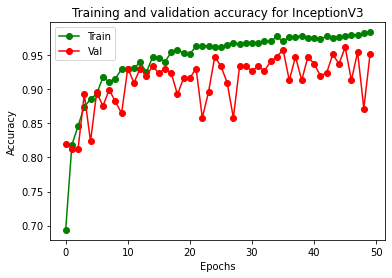

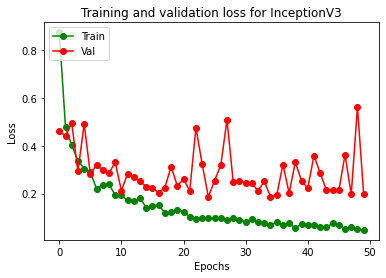

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc,'go-' )
plt.plot  ( epochs, val_acc,'ro-' )
plt.title ('Training and validation accuracy for InceptionV3')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss,'go-' )
plt.plot  ( epochs, val_loss,'ro-' )
plt.title ('Training and validation loss for InceptionV3')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")

### <a id='413'>4.1.3 Evaluate InceptionV3 Network</a>  
  

In [ ]:
os.listdir(checkpoint_dir_aug_Incep)

['cp-0001.ckpt.data-00000-of-00001',
 'cp-0001.ckpt.index',
 'checkpoint',
 'cp-0004.ckpt.data-00000-of-00001',
 'cp-0004.ckpt.index',
 'cp-0006.ckpt.data-00000-of-00001',
 'cp-0006.ckpt.index',
 'cp-0008.ckpt.data-00000-of-00001',
 'cp-0008.ckpt.index',
 'cp-0011.ckpt.data-00000-of-00001',
 'cp-0011.ckpt.index',
 'cp-0015.ckpt.data-00000-of-00001',
 'cp-0015.ckpt.index',
 'cp-0025.ckpt.data-00000-of-00001',
 'cp-0025.ckpt.index',
 'cp-0036.ckpt.data-00000-of-00001',
 'cp-0036.ckpt.index',
 'cp-0046.ckpt.data-00000-of-00001',
 'cp-0046.ckpt.index']

In [ ]:
latest_aug_Incep = tf.train.latest_checkpoint(checkpoint_dir_aug_Incep)

# # Create a new model instance
# model = create_model()

# Load the previously saved weights
model.load_weights(latest_aug_Incep)


In [ ]:
# modelT = keras.models.load_weights('/content/drive/MyDrive/RGBimages/MODEL/checkpoint')  

test_datagen_Incep = ImageDataGenerator(rescale=1./255)

test_generator_Incep = test_datagen_Incep.flow_from_directory(
    Testing_path,
    target_size=(150, 150),
    # color_mode="grayscale",
    batch_size=32,
    classes=None,
    class_mode="categorical",
    shuffle=True)

# Re-evaluate the model
score_Incep = model.evaluate(test_generator_Incep)
# print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

Found 394 images belonging to 4 classes.
13/13 [==============================] - 3s 217ms/step - loss: 3.9934 - accuracy: 0.7741


## <a id='42'>4.2 ResNet50</a>  



ResNet50 is a 50 layer deep residual network that was designed for
image classification. The ResNet Architecture is designed for 224 by 224 images.


### <a id='421'>4.2.1 Define ResNet50 Network</a>  


In [ ]:
'''
Feature Extraction is performed by ResNet50 pretrained on imagenet weights. 
Input size is 224 x 224.
'''
def feature_extractor(inputs):

  feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')(inputs)
  return feature_extractor


'''
Defines final dense layers and subsequent softmax layer for classification.
'''
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(4, activation="softmax", name="classification")(x)
    return x

'''
Connect the feature extraction and "classifier" layers to build the model.
'''
def final_model(inputs):

    resnet_feature_extractor = feature_extractor(inputs)
    classification_output = classifier(resnet_feature_extractor)

    return classification_output

'''
Define the model and compile it. 
Use Stochastic Gradient Descent as the optimizer.
Use Categorical CrossEntropy as our loss function.
''' 


def define_compile_model():
  inputs = tf.keras.layers.Input(shape=(224,224,3))
  
  classification_output = final_model(inputs) 
  model = tf.keras.Model(inputs=inputs, outputs = classification_output)
 
  model.compile(optimizer='SGD', 
                loss='categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model


model = define_compile_model()

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
classification (Dense)       (None, 4)                 2052

### <a id='422'>4.2.2 Train ResNet50 Network</a>  


In [ ]:
train_gen_aug_RN = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.2,
                                    # zoom_range=0,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
val_datagen_aug_RN = ImageDataGenerator(rescale=1./255)

train_generator_aug_RN = train_gen_aug_RN.flow_from_directory(
    Training_temp_path,
    target_size=(224, 224),
    # color_mode="grayscale",
    batch_size=32,
    classes=None,
    class_mode="categorical",
    shuffle=True)

validation_generator_aug_RN = val_datagen_aug_RN.flow_from_directory(
        Validation_temp_path,
        target_size=(224, 224),
        # color_mode="grayscale",
        batch_size=32,
        classes=None,
        class_mode="categorical",
        shuffle=True)
print('\n')
print('batch size is {}'. format(train_generator_aug_RN.batch_size))
print('For training set, image shape is {}'. format(train_generator_aug_RN.image_shape))
print('For testing set, image shape is {}'. format(validation_generator_aug_RN.image_shape))

Found 2581 images belonging to 4 classes.
Found 289 images belonging to 4 classes.


batch size is 32
For training set, image shape is (224, 224, 3)
For testing set, image shape is (224, 224, 3)


In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path_aug_RN  = "/content/drive/MyDrive/RGBimages/ResNet Model"
checkpoint_dir_aug_RN = os.path.dirname(checkpoint_path_aug_RN)

## uncomment the following lines to tarin and save the model

# Create a callback that saves the best model
callbacks = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_aug_RN,
    monitor="val_accuracy",
    verbose=2,
    save_best_only=True,
    save_weights_only=True,
    mode="auto",
    save_freq="epoch",
    options=None,
)

history = model.fit(
            train_generator_aug_RN,
            validation_data=validation_generator_aug_RN,
            epochs=50,
            verbose=2,            
            callbacks = [callbacks])

Epoch 1/50
81/81 - 726s - loss: 0.5833 - accuracy: 0.7857 - val_loss: 2.0449 - val_accuracy: 0.1384

Epoch 00001: val_accuracy improved from -inf to 0.13841, saving model to /content/drive/MyDrive/RGBimages/ResNet Model
Epoch 2/50
81/81 - 63s - loss: 0.2160 - accuracy: 0.9237 - val_loss: 2.2681 - val_accuracy: 0.1384

Epoch 00002: val_accuracy did not improve from 0.13841
Epoch 3/50
81/81 - 63s - loss: 0.1376 - accuracy: 0.9585 - val_loss: 2.7145 - val_accuracy: 0.1384

Epoch 00003: val_accuracy did not improve from 0.13841
Epoch 4/50
81/81 - 63s - loss: 0.1106 - accuracy: 0.9613 - val_loss: 3.9410 - val_accuracy: 0.1384

Epoch 00004: val_accuracy did not improve from 0.13841
Epoch 5/50
81/81 - 63s - loss: 0.0685 - accuracy: 0.9768 - val_loss: 4.4805 - val_accuracy: 0.1384

Epoch 00005: val_accuracy did not improve from 0.13841
Epoch 6/50
81/81 - 63s - loss: 0.0556 - accuracy: 0.9818 - val_loss: 3.2329 - val_accuracy: 0.1419

Epoch 00006: val_accuracy improved from 0.13841 to 0.14187, 

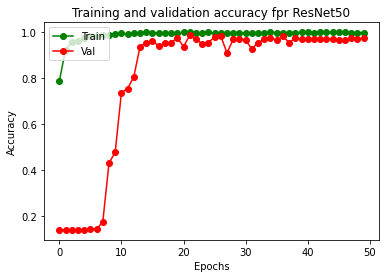

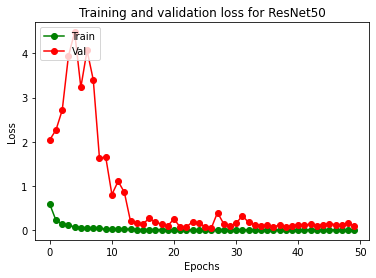

In [ ]:

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc,'go-' )
plt.plot  ( epochs, val_acc,'ro-' )
plt.title ('Training and validation accuracy fpr ResNet50')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss,'go-' )
plt.plot  ( epochs, val_loss,'ro-' )
plt.title ('Training and validation loss for ResNet50')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")

### <a id='423'>4.2.3 Evaluate ResNet50 Network</a>  

In [ ]:
os.listdir(checkpoint_dir_aug_RN)

['Testing',
 'MODEL',
 'Training_temp',
 '.ipynb_checkpoints',
 'Validation_temp',
 'ResNet Model',
 'MoledAug',
 'InceptionV3 Model',
 'ResNet Model.index',
 'checkpoint',
 'ResNet Model.data-00000-of-00001']

In [ ]:
latest_aug_RN = tf.train.latest_checkpoint(checkpoint_dir_aug_RN)

# # Create a new model instance
# model = create_model()

# Load the previously saved weights
model.load_weights(latest_aug_RN)


In [ ]:
# modelT = keras.models.load_weights('/content/drive/MyDrive/RGBimages/MODEL/checkpoint')  

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    Testing_path,
    target_size=(224, 224),
    # color_mode="grayscale",
    batch_size=32,
    classes=None,
    class_mode="categorical",
    shuffle=True)

# Re-evaluate the model
score_aug = model.evaluate(test_generator)
# print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

Found 394 images belonging to 4 classes.
13/13 [==============================] - 85s 7s/step - loss: 1.4674 - accuracy: 0.8071
